[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Icey_m_a\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Icey_m_a\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Icey_m_a\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Icey_m_a\AppData\Roaming\nltk_data...


🔤 ADVANCED NLP ANALYSIS FOR AI JOB MARKET
✅ Data loaded: (18052, 8)
Columns available: ['job_title', 'company', 'location', 'salary', 'skills', 'data_source']

🔧 SETTING UP NLP PIPELINE...

🛠️ ADVANCED SKILLS ANALYSIS

📊 SKILLS BY CATEGORY:
  PROGRAMMING: 40815 skills
  ML_FRAMEWORKS: 0 skills
  BIG_DATA: 2419 skills
  CLOUD: 5281 skills
  AI_DOMAINS: 2145 skills
  DATA_TOOLS: 3617 skills
  OTHER: 16001 skills


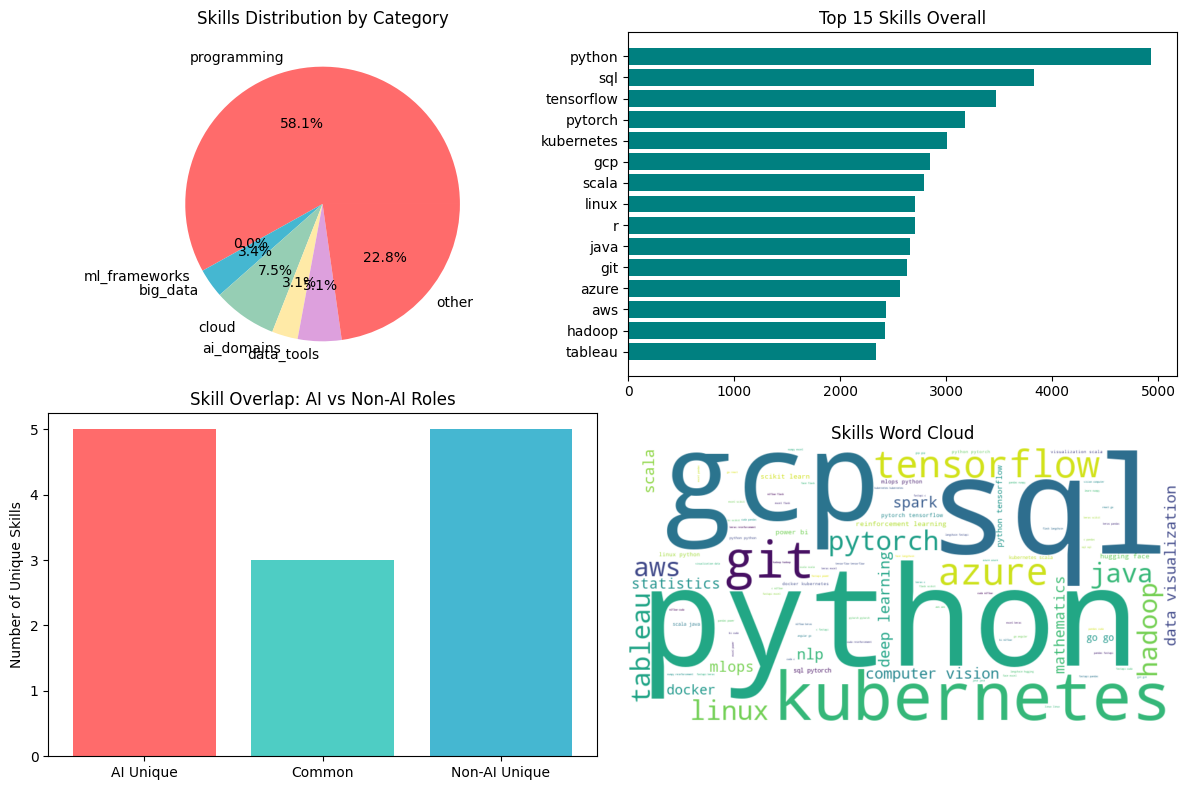


🎯 JOB TITLE NLP ANALYSIS


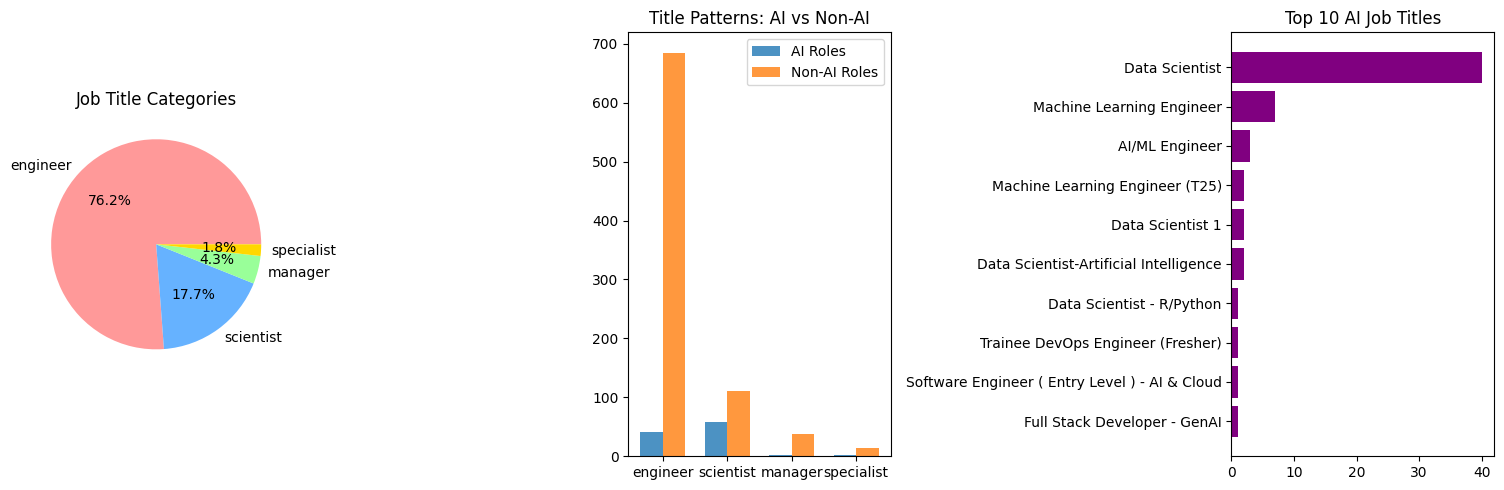


💰 SALARY-SKILLS CORRELATION ANALYSIS


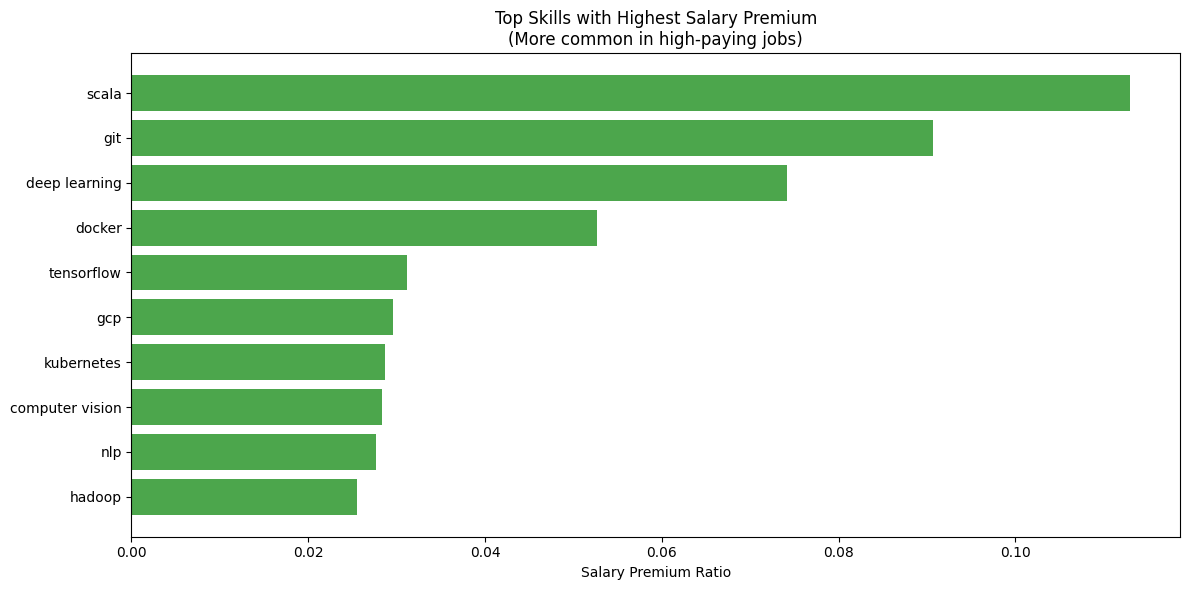


💎 TOP SKILLS WITH HIGHEST SALARY PREMIUM:
  Scala: +0.1x more common in high-paying jobs
  Git: +0.1x more common in high-paying jobs
  Deep Learning: +0.1x more common in high-paying jobs
  Docker: +0.1x more common in high-paying jobs
  Tensorflow: +0.0x more common in high-paying jobs

🔍 SKILLS CLUSTERING AND TRENDS

✅ ADVANCED NLP ANALYSIS COMPLETED!
📊 Generated visualizations:
   - nlp_skills_analysis.png
   - nlp_job_titles.png
   - nlp_salary_skills.png
   - nlp_industry_skills.png

🎯 READY FOR DASHBOARD DEVELOPMENT!


In [1]:
# ADVANCED NLP ANALYSIS FOR AI JOB MARKET

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

# Download NLTK data
try:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('vader_lexicon')
except:
    print("NLTK downloads completed or already available")

print("🔤 ADVANCED NLP ANALYSIS FOR AI JOB MARKET")
print("=" * 60)

# Load the data
project_root = r'C:\Users\Icey_m_a\Documents\Icey\Icey\School\Python\AI Job Market Analysis'
master_path = os.path.join(project_root, 'data', 'processed', 'master_ai_jobs.csv')
df = pd.read_csv(master_path)

print(f"✅ Data loaded: {df.shape}")
print(f"Columns available: {[col for col in df.columns if isinstance(df[col].iloc[0] if len(df) > 0 else '', str)]}")

# 1. TEXT PREPROCESSING FUNCTIONS
print("\n🔧 SETTING UP NLP PIPELINE...")

def preprocess_text(text):
    """Clean and preprocess text data"""
    if pd.isna(text):
        return ""
    
    # Convert to string and lowercase
    text = str(text).lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

# 2. SKILLS ANALYSIS
print("\n🛠️ ADVANCED SKILLS ANALYSIS")

if 'skills' in df.columns:
    # Extract all skills
    all_skills = []
    skill_categories = {
        'programming': ['python', 'java', 'javascript', 'c++', 'r', 'sql', 'scala', 'go'],
        'ml_frameworks': ['tensorflow', 'pytorch', 'keras', 'scikit-learn', 'mxnet'],
        'big_data': ['spark', 'hadoop', 'kafka', 'hive', 'airflow'],
        'cloud': ['aws', 'azure', 'gcp', 'docker', 'kubernetes'],
        'ai_domains': ['nlp', 'computer vision', 'reinforcement learning', 'deep learning'],
        'data_tools': ['pandas', 'numpy', 'tableau', 'powerbi', 'excel']
    }
    
    for skills in df['skills'].dropna():
        if isinstance(skills, str):
            skills_list = re.split(r'[,|;]', skills)
            all_skills.extend([skill.strip().lower() for skill in skills_list if skill.strip()])
    
    # Categorize skills
    categorized_skills = {category: [] for category in skill_categories.keys()}
    categorized_skills['other'] = []
    
    for skill in all_skills:
        categorized = False
        for category, keywords in skill_categories.items():
            if any(keyword in skill for keyword in keywords):
                categorized_skills[category].append(skill)
                categorized = True
                break
        if not categorized:
            categorized_skills['other'].append(skill)
    
    # Display skill categories
    print("\n📊 SKILLS BY CATEGORY:")
    for category, skills in categorized_skills.items():
        print(f"  {category.upper()}: {len(skills)} skills")
    
    # Visualize skill categories
    plt.figure(figsize=(12, 8))
    
    # Plot 1: Skill categories distribution
    plt.subplot(2, 2, 1)
    category_counts = {cat: len(skills) for cat, skills in categorized_skills.items()}
    plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', 
            colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD'])
    plt.title('Skills Distribution by Category')
    
    # Plot 2: Top skills overall
    plt.subplot(2, 2, 2)
    skill_counts = Counter(all_skills)
    top_skills = skill_counts.most_common(15)
    skills, counts = zip(*top_skills)
    plt.barh(range(len(skills)), counts, color='teal')
    plt.yticks(range(len(skills)), skills)
    plt.title('Top 15 Skills Overall')
    plt.gca().invert_yaxis()
    
    # Plot 3: Skills in AI vs Non-AI roles
    if 'is_ai_role' in df.columns:
        plt.subplot(2, 2, 3)
        ai_skills = []
        non_ai_skills = []
        
        for idx, row in df.iterrows():
            if pd.isna(row['skills']):
                continue
            if isinstance(row['skills'], str):
                skills_list = re.split(r'[,|;]', row['skills'])
                if row['is_ai_role']:
                    ai_skills.extend([s.strip().lower() for s in skills_list])
                else:
                    non_ai_skills.extend([s.strip().lower() for s in skills_list])
        
        ai_top = Counter(ai_skills).most_common(8)
        non_ai_top = Counter(non_ai_skills).most_common(8)
        
        # Compare top skills
        ai_skills_set = set([skill for skill, count in ai_top])
        non_ai_skills_set = set([skill for skill, count in non_ai_top])
        unique_ai = ai_skills_set - non_ai_skills_set
        unique_non_ai = non_ai_skills_set - ai_skills_set
        common = ai_skills_set & non_ai_skills_set
        
        categories = ['AI Unique', 'Common', 'Non-AI Unique']
        counts = [len(unique_ai), len(common), len(unique_non_ai)]
        plt.bar(categories, counts, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
        plt.title('Skill Overlap: AI vs Non-AI Roles')
        plt.ylabel('Number of Unique Skills')
    
    # Plot 4: Skills Word Cloud
    plt.subplot(2, 2, 4)
    if all_skills:
        skills_text = ' '.join(all_skills)
        wordcloud = WordCloud(width=800, height=400, background_color='white', 
                             colormap='viridis', max_words=100).generate(skills_text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Skills Word Cloud')
    
    plt.tight_layout()
    plt.savefig(os.path.join(project_root, 'images', 'nlp_skills_analysis.png'), 
                dpi=300, bbox_inches='tight')
    plt.show()

# 3. JOB TITLE ANALYSIS
print("\n🎯 JOB TITLE NLP ANALYSIS")

if 'job_title' in df.columns:
    # Preprocess job titles
    job_titles = df['job_title'].dropna().astype(str)
    processed_titles = job_titles.apply(preprocess_text)
    
    # Extract key patterns from job titles
    title_patterns = {
        'engineer': ['engineer', 'developer', 'architect'],
        'scientist': ['scientist', 'researcher', 'analyst'],
        'manager': ['manager', 'director', 'lead', 'head'],
        'specialist': ['specialist', 'consultant', 'expert']
    }
    
    title_categories = {}
    for pattern, keywords in title_patterns.items():
        count = processed_titles.str.contains('|'.join(keywords)).sum()
        title_categories[pattern] = count
    
    # Visualize job title patterns
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.pie(title_categories.values(), labels=title_categories.keys(), autopct='%1.1f%%',
            colors=['#FF9999', '#66B2FF', '#99FF99', '#FFD700'])
    plt.title('Job Title Categories')
    
    # AI vs Non-AI title patterns
    if 'is_ai_role' in df.columns:
        plt.subplot(1, 3, 2)
        ai_titles = df[df['is_ai_role']]['job_title'].dropna().astype(str)
        non_ai_titles = df[~df['is_ai_role']]['job_title'].dropna().astype(str)
        
        ai_counts = {}
        non_ai_counts = {}
        
        for pattern, keywords in title_patterns.items():
            ai_counts[pattern] = ai_titles.str.contains('|'.join(keywords), case=False).sum()
            non_ai_counts[pattern] = non_ai_titles.str.contains('|'.join(keywords), case=False).sum()
        
        x = np.arange(len(title_patterns))
        width = 0.35
        
        plt.bar(x - width/2, ai_counts.values(), width, label='AI Roles', alpha=0.8)
        plt.bar(x + width/2, non_ai_counts.values(), width, label='Non-AI Roles', alpha=0.8)
        plt.xticks(x, title_patterns.keys())
        plt.title('Title Patterns: AI vs Non-AI')
        plt.legend()
    
    # Most common AI job titles
    plt.subplot(1, 3, 3)
    if 'is_ai_role' in df.columns:
        ai_job_titles = df[df['is_ai_role']]['job_title'].value_counts().head(10)
        plt.barh(range(len(ai_job_titles)), ai_job_titles.values, color='purple')
        plt.yticks(range(len(ai_job_titles)), ai_job_titles.index)
        plt.title('Top 10 AI Job Titles')
        plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.savefig(os.path.join(project_root, 'images', 'nlp_job_titles.png'), 
                dpi=300, bbox_inches='tight')
    plt.show()

# 4. SALARY VS SKILLS CORRELATION
print("\n💰 SALARY-SKILLS CORRELATION ANALYSIS")

if 'salary_clean' in df.columns and 'skills' in df.columns:
    # Get high-paying skills (top 25% salary)
    salary_threshold = df['salary_clean'].quantile(0.75)
    high_pay_jobs = df[df['salary_clean'] >= salary_threshold]
    low_pay_jobs = df[df['salary_clean'] <= df['salary_clean'].quantile(0.25)]
    
    high_pay_skills = []
    low_pay_skills = []
    
    for idx, row in high_pay_jobs.iterrows():
        if pd.isna(row['skills']):
            continue
        if isinstance(row['skills'], str):
            skills_list = re.split(r'[,|;]', row['skills'])
            high_pay_skills.extend([s.strip().lower() for s in skills_list])
    
    for idx, row in low_pay_jobs.iterrows():
        if pd.isna(row['skills']):
            continue
        if isinstance(row['skills'], str):
            skills_list = re.split(r'[,|;]', row['skills'])
            low_pay_skills.extend([s.strip().lower() for s in skills_list])
    
    high_pay_counter = Counter(high_pay_skills)
    low_pay_counter = Counter(low_pay_skills)
    
    # Find skills that are more common in high-paying jobs
    skill_premium = {}
    all_unique_skills = set(high_pay_counter.keys()) | set(low_pay_counter.keys())
    
    for skill in all_unique_skills:
        high_freq = high_pay_counter.get(skill, 0) / len(high_pay_skills) if high_pay_skills else 0
        low_freq = low_pay_counter.get(skill, 0) / len(low_pay_skills) if low_pay_skills else 0
        
        if low_freq > 0:
            premium = (high_freq - low_freq) / low_freq
            skill_premium[skill] = premium
    
    # Top skills with highest salary premium
    top_premium_skills = sorted(skill_premium.items(), key=lambda x: x[1], reverse=True)[:10]
    
    plt.figure(figsize=(12, 6))
    skills, premiums = zip(*top_premium_skills)
    
    colors = ['green' if p > 0 else 'red' for p in premiums]
    plt.barh(range(len(skills)), premiums, color=colors, alpha=0.7)
    plt.yticks(range(len(skills)), skills)
    plt.title('Top Skills with Highest Salary Premium\n(More common in high-paying jobs)')
    plt.xlabel('Salary Premium Ratio')
    plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.savefig(os.path.join(project_root, 'images', 'nlp_salary_skills.png'), 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n💎 TOP SKILLS WITH HIGHEST SALARY PREMIUM:")
    for skill, premium in top_premium_skills[:5]:
        print(f"  {skill.title()}: {premium:+.1f}x more common in high-paying jobs")

# 5. SKILLS CLUSTERING ANALYSIS
print("\n🔍 SKILLS CLUSTERING AND TRENDS")

if 'skills' in df.columns and 'industry' in df.columns:
    # Analyze skills by industry
    industry_skills = {}
    
    for industry in df['industry'].dropna().unique():
        industry_jobs = df[df['industry'] == industry]
        industry_skill_list = []
        
        for skills in industry_jobs['skills'].dropna():
            if isinstance(skills, str):
                skills_list = re.split(r'[,|;]', skills)
                industry_skill_list.extend([s.strip().lower() for s in skills_list])
        
        industry_skills[industry] = Counter(industry_skill_list)
    
    # Show top industries and their unique skills
    top_industries = df['industry'].value_counts().head(5).index
    
    plt.figure(figsize=(15, 10))
    
    for i, industry in enumerate(top_industries, 1):
        plt.subplot(2, 3, i)
        top_skills = industry_skills[industry].most_common(8)
        
        if top_skills:
            skills, counts = zip(*top_skills)
            plt.barh(range(len(skills)), counts, color=f'C{i-1}')
            plt.yticks(range(len(skills)), skills)
            plt.title(f'Top Skills: {industry}')
            plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.savefig(os.path.join(project_root, 'images', 'nlp_industry_skills.png'), 
                dpi=300, bbox_inches='tight')
    plt.show()

print("\n" + "=" * 60)
print("✅ ADVANCED NLP ANALYSIS COMPLETED!")
print("📊 Generated visualizations:")
print("   - nlp_skills_analysis.png")
print("   - nlp_job_titles.png") 
print("   - nlp_salary_skills.png")
print("   - nlp_industry_skills.png")
print("\n🎯 READY FOR DASHBOARD DEVELOPMENT!")